## EDA

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# since 'ID#' column is not necessary so we remove it.
df.drop('ID#',axis=1,inplace=True)

In [5]:
df.shape

(3999, 11)

In [6]:
df.Balance.value_counts()

Balance
1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: count, Length: 3904, dtype: int64

In [7]:
df.cc1_miles.value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [8]:
df.Qual_miles.value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [9]:
df.size

43989

In [10]:
df.ndim

2

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


## Data Preprocessing

In [13]:
## Handling missing values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [14]:
# checking for duplicates
df[df.duplicated()]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [15]:
df.drop_duplicates()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
df.shape

(3999, 11)

In [17]:
df.size

43989

In [18]:
# checking for outliers in each column
import matplotlib.pyplot as plt

In [19]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [20]:
cat_list=[]
num_list=[]


for i in df.columns:
    unique_values = len(df[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)

In [21]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [22]:
len(df['Balance'].unique())

3904

In [23]:
cat_list

['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']

In [24]:
num_list

['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

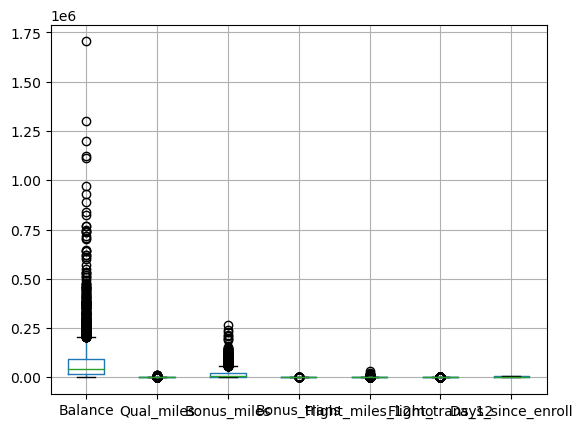

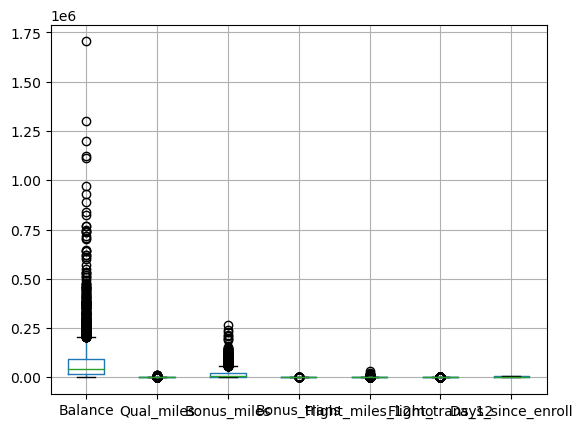

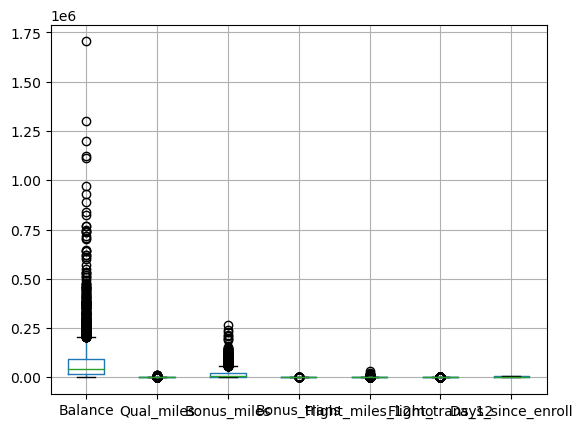

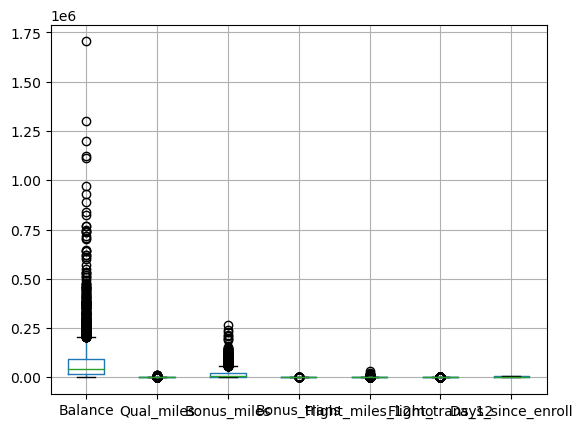

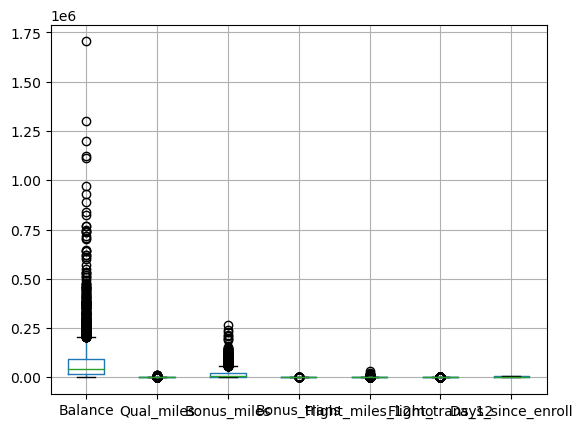

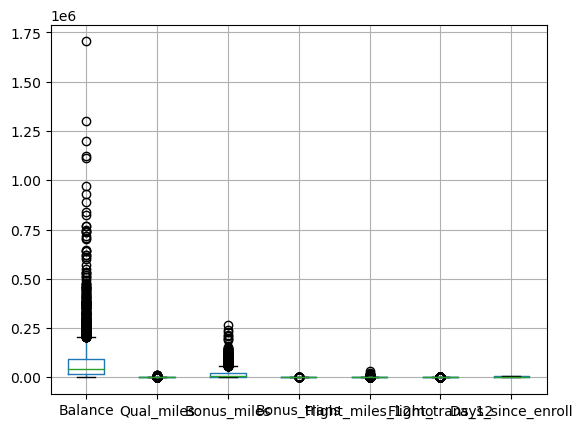

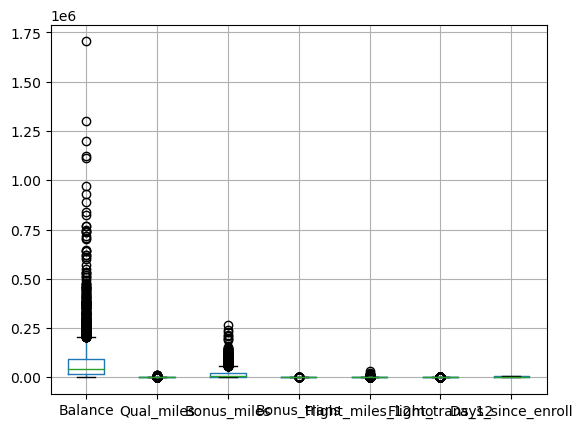

In [25]:
for i in num_list:
    df.boxplot(column=num_list)
    plt.show()

In [26]:
# It seems all numerical columns have outliers

In [27]:
df.loc[:,num_list]

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [28]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

Balance yes
Qual_miles yes
Bonus_miles yes
Bonus_trans yes
Flight_miles_12mo yes
Flight_trans_12 yes
Days_since_enroll no


In [29]:
import seaborn as sns

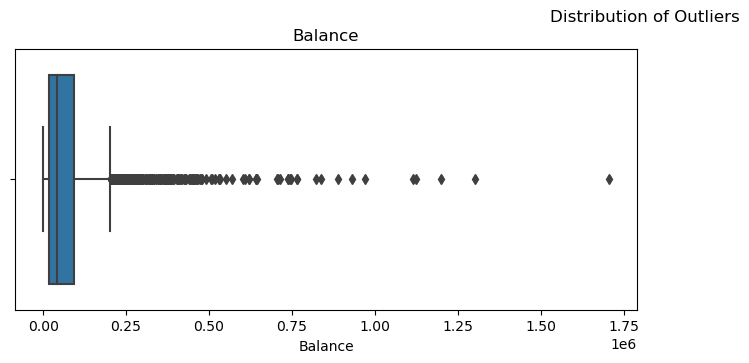

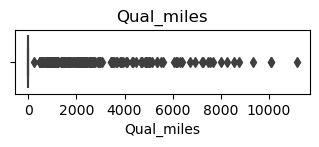

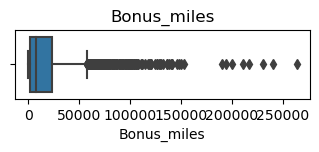

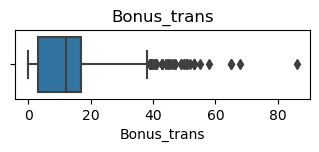

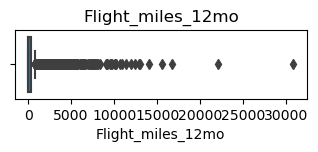

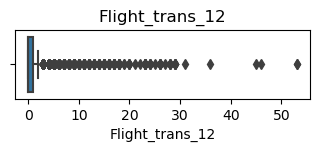

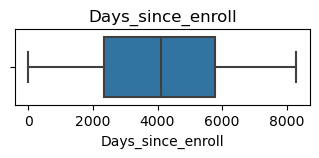

In [30]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    plt.tight_layout()
    k+=1
    plt.show()


In [31]:
import warnings
warnings.filterwarnings('ignore')

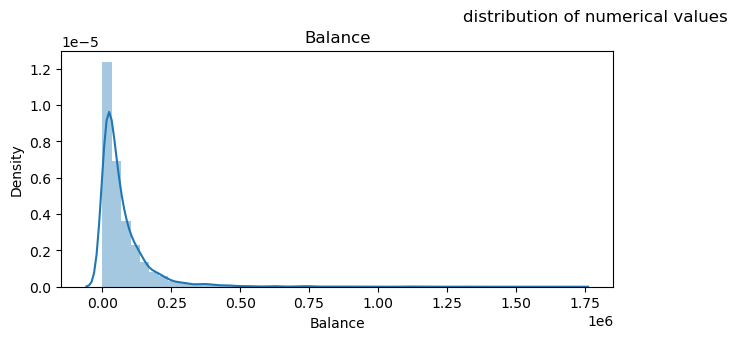

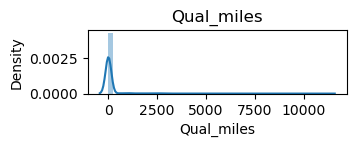

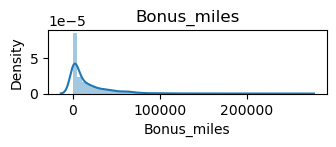

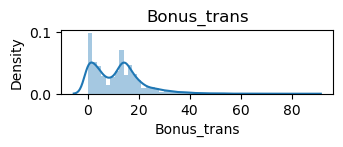

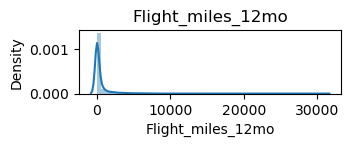

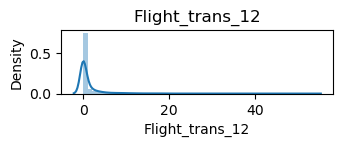

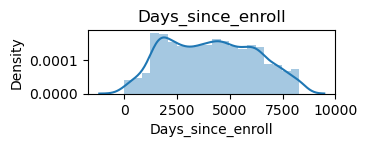

In [32]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")
for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

In [33]:
list(num_list)

['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

In [34]:
out_list=['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12']

In [35]:
# Removing the outliers 
for i in df.loc[:,out_list]:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    df_no_out=df[(df[i]>=low_lim) & (df[i]<=up_lim)]
    

In [36]:
df_no_out.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


## multiple visualizations to understand the hidden patterns in the dataset

In [37]:
df_no_out.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


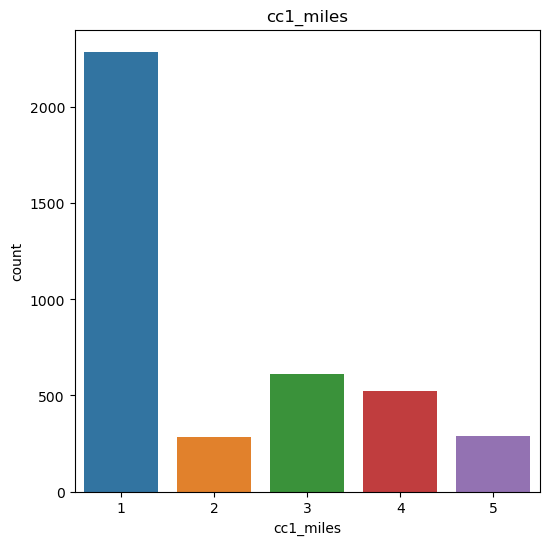

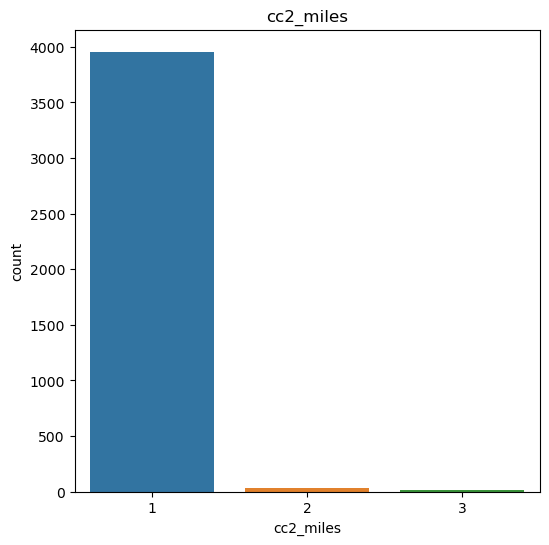

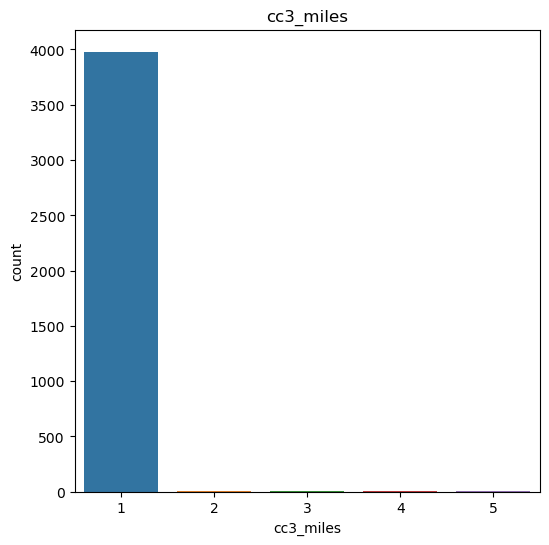

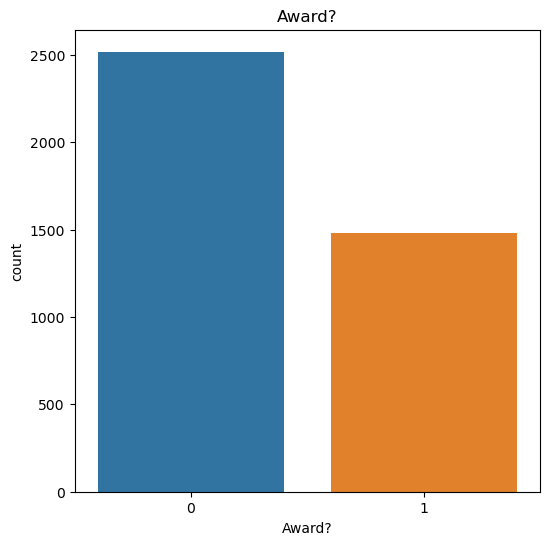

In [38]:
for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(x = i, data =df.loc[:,cat_list])
    plt.title(i)
    plt.show()

In [39]:
df.cc3_miles.value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

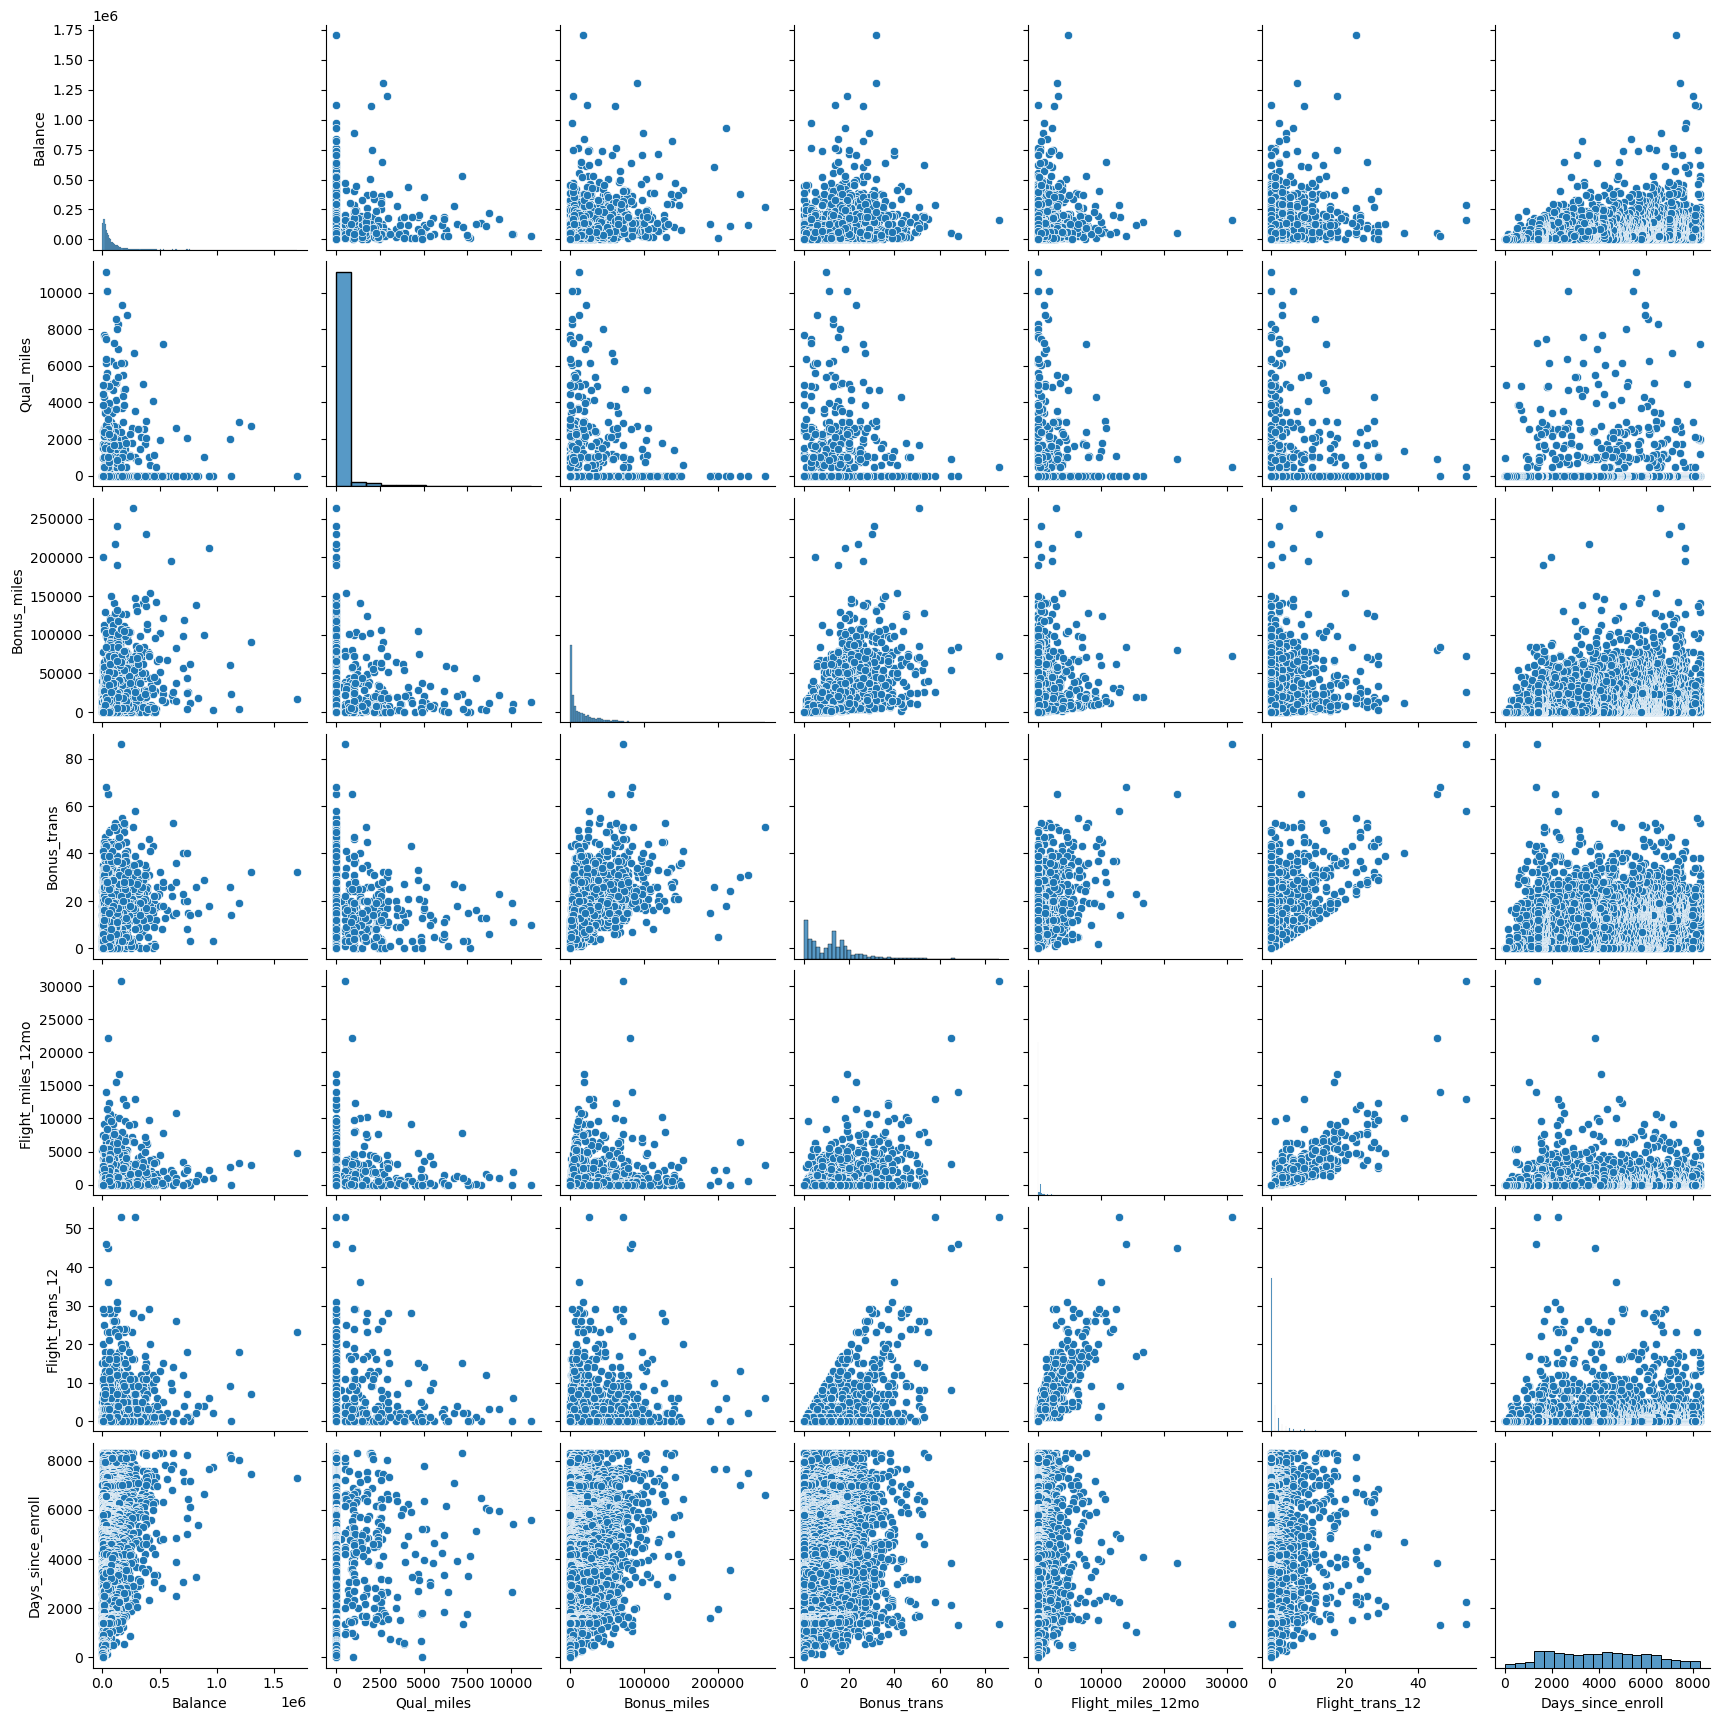

In [40]:
sns.pairplot(df.loc[:,num_list]);
plt.show()

In [41]:
num_list



['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

In [42]:
df[num_list].corr()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312
Bonus_miles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000


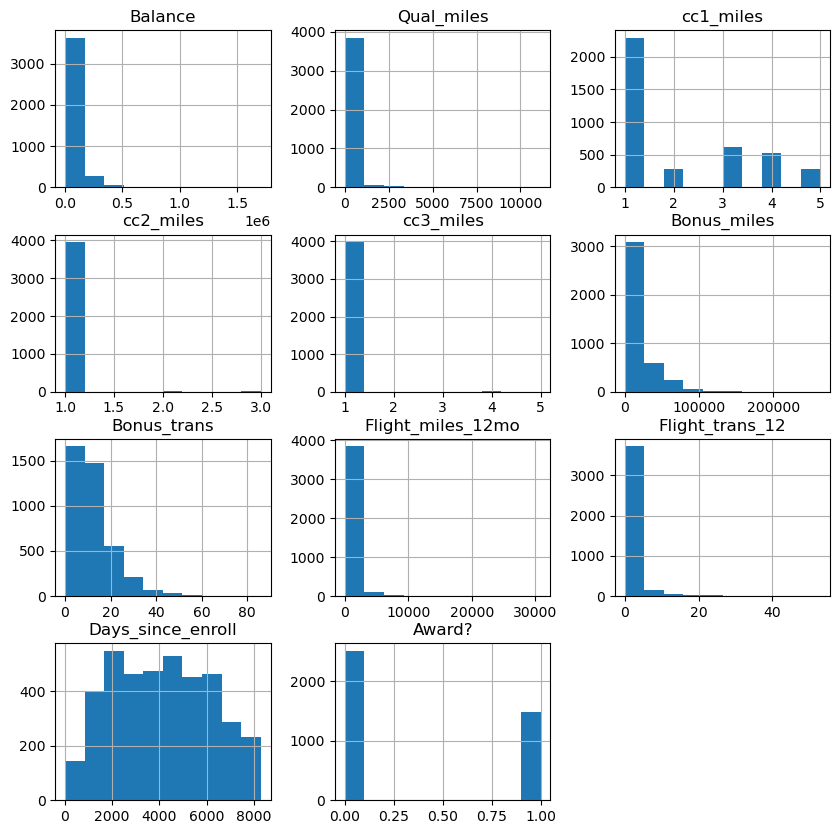

In [43]:
df.hist(figsize=(10,10));
plt.show()

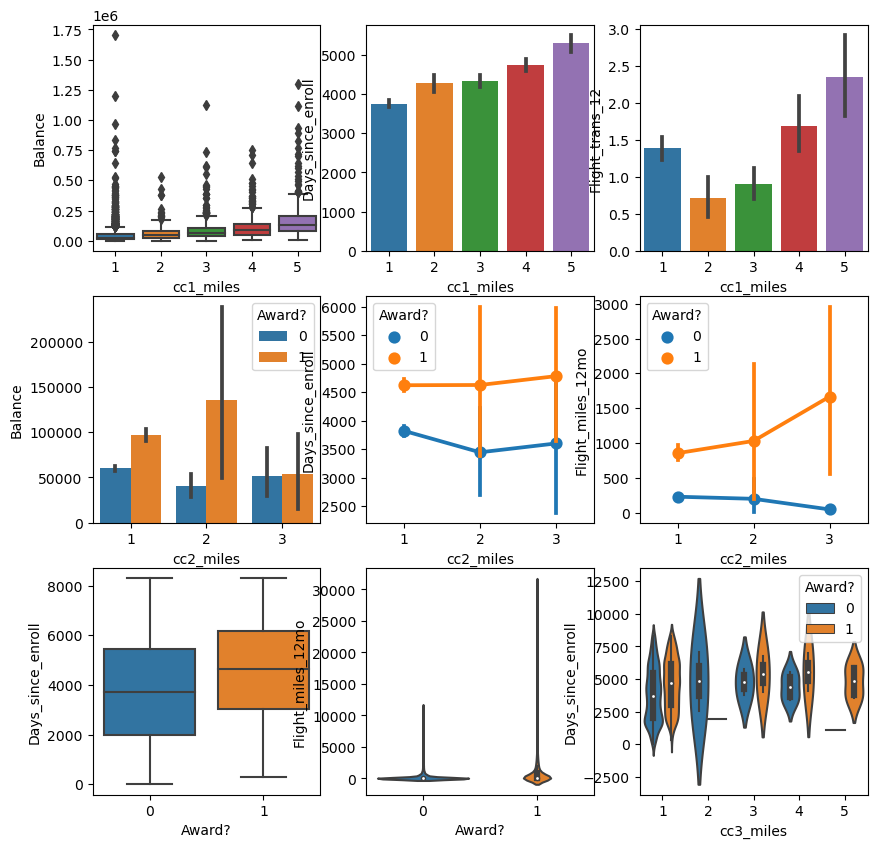

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x="cc1_miles",y="Balance",data=df)
plt.subplot(3,3,2)
sns.barplot(x ='cc1_miles',y ='Days_since_enroll', data = df)
plt.subplot(3,3,3)
sns.barplot(x ='cc1_miles',y ='Flight_trans_12', data = df)
plt.subplot(3,3,4)
sns.barplot(x ='cc2_miles',y ='Balance',hue="Award?", data = df)
plt.subplot(3,3,5)
sns.pointplot(x ='cc2_miles',y ='Days_since_enroll', data = df,hue="Award?")
plt.subplot(3,3,6)
sns.pointplot(x ='cc2_miles',y ='Flight_miles_12mo', data = df,hue="Award?")
plt.subplot(3,3,7)
sns.boxplot(x ='Award?',y ='Days_since_enroll', data = df)
plt.subplot(3,3,8)
sns.violinplot(x ='Award?',y ='Flight_miles_12mo', data = df)
plt.subplot(3,3,9)
sns.violinplot(x ='cc3_miles',y ='Days_since_enroll',hue="Award?", data = df)
plt.show()


In [45]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


In [46]:
df.Qual_miles.value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [47]:
df.drop('Qual_miles',axis=1,inplace=True)

In [48]:
df.corr()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
cc1_miles,0.338344,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121
Award?,0.178494,0.335457,0.005332,0.023484,0.373506,0.333893,0.217715,0.247909,0.188121,1.000000


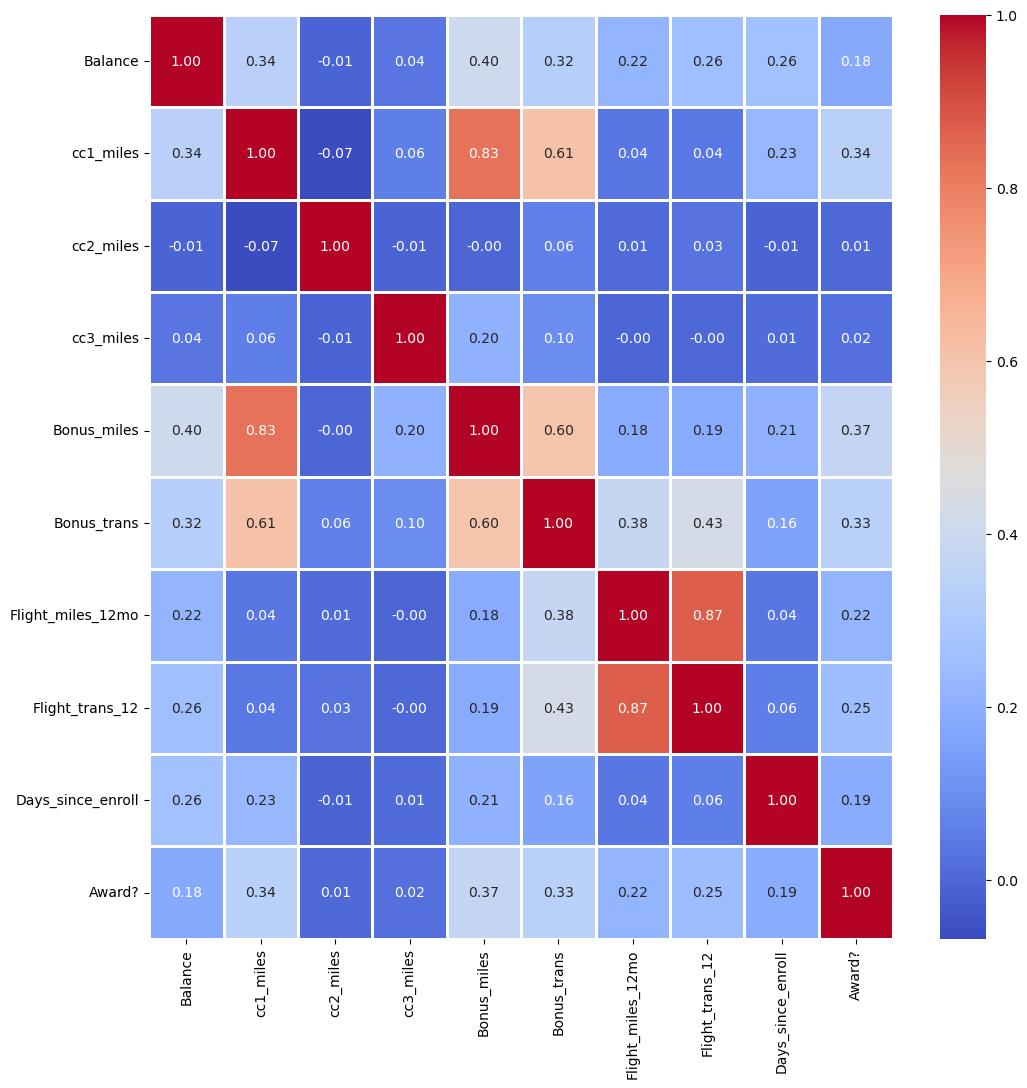

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

## Implementing Clustering Algorithms:

## KMeans

In [50]:
# KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
df.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [52]:
df1=df.drop('Award?',axis=1)
df1.head()
# since we are working on clustering so here no need of target column so we  droped 'Award?' column  from dataset since ie is target column here.

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935


In [53]:
## Method 1 for finding optimum value of k
## getting Inertia
inertia=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
print(inertia)
    

[42959427020036.95, 20821253690634.242, 11787660234495.803, 7547258976350.418, 5722476702508.047, 4554660433860.36, 3695541282116.861, 3269677979662.307, 2895239123040.7134, 2618878966685.783, 2380905911517.6396, 2137652374657.4792, 1963879372771.2412, 1844784503310.0093, 1711872697183.4705, 1581336633015.8025, 1460920520020.7334, 1373105494270.6553, 1262108503021.5608]


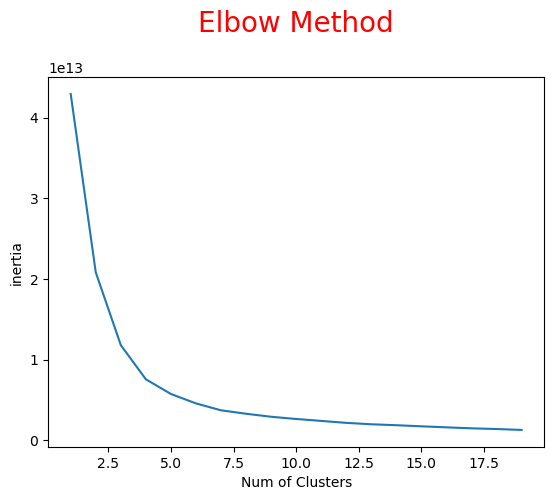

In [54]:
## ploting Elbow curve
plt.plot(range(1,20),inertia)
plt.xlabel('Num of Clusters')
plt.ylabel('inertia')
plt.title('Elbow Method',size=20,color='red',y=(1.1));
plt.show()


In [55]:
kmeans=KMeans(n_clusters=10)

In [56]:
cluster=kmeans.fit(df1)

In [57]:
cluster.labels_

array([0, 0, 4, ..., 5, 4, 0])

In [58]:
import numpy as np

In [59]:
np.unique(cluster.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
df1['cluster']=cluster.labels_

In [61]:
df1.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,4
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,5


In [62]:
df1[df1['cluster']==5].head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
4,97752,4,1,1,43300,26,2077,4,6935,5
6,84914,3,1,1,27482,25,0,0,6994,5
9,104860,3,1,1,28426,28,1150,3,6931,5
18,91473,3,1,1,27408,17,0,0,6903,5
46,92336,2,1,1,11214,6,0,0,6884,5


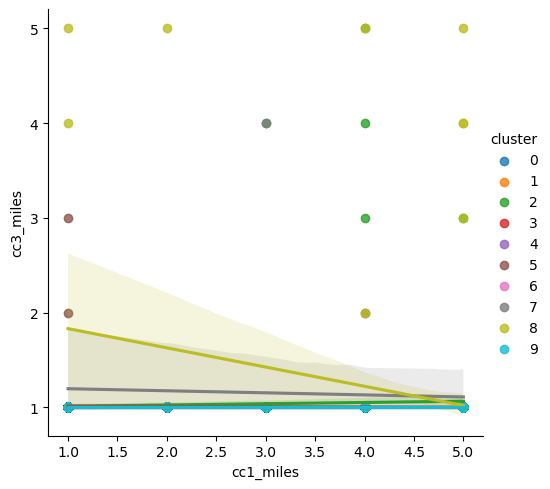

In [63]:
sns.lmplot(data=df1,x='cc1_miles',y='cc3_miles',hue='cluster');
plt.show()

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(df1,cluster.labels_)

0.4285154653996258

## Hierarchial clustering

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
import scipy.cluster.hierarchy as sch

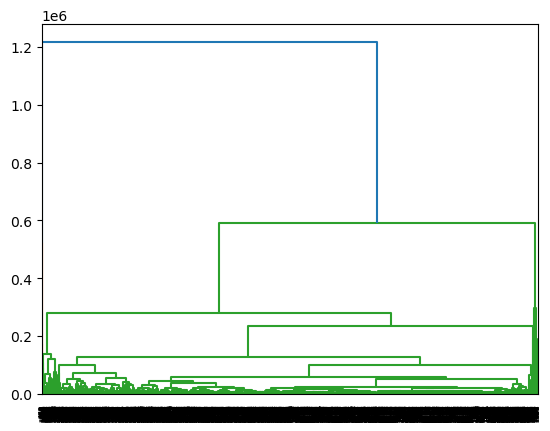

In [68]:
dendogram=sch.dendrogram(sch.linkage(df1,method='average'))
plt.show()

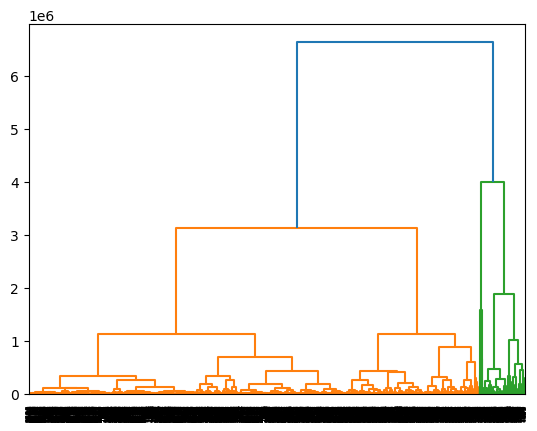

In [69]:
dendogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.show()

In [70]:
agg=AgglomerativeClustering(n_clusters=2,linkage='average')

In [71]:
cluster1=agg.fit(df1)

In [72]:
cluster1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
np.unique(cluster1.labels_)

array([0, 1], dtype=int64)

In [74]:
silhouette_score(df1,cluster1.labels_)

0.9228647847506257

In [75]:
df1['cluster1']=cluster1.labels_

In [76]:
## To check for optimum value of  no of clusters manually

In [77]:
output=[]
for i in range(2,11):
    labels=AgglomerativeClustering(n_clusters=i,linkage='average').fit(df1).labels_
    score=silhouette_score(df1,labels)
    output.append([i,score])

In [78]:
output

[[2, 0.9228647847506616],
 [3, 0.8502692611292767],
 [4, 0.8498749534880027],
 [5, 0.8360679770790886],
 [6, 0.7275110767654306],
 [7, 0.6872911176262821],
 [8, 0.6840997928008137],
 [9, 0.6585087778849966],
 [10, 0.658272076967618]]

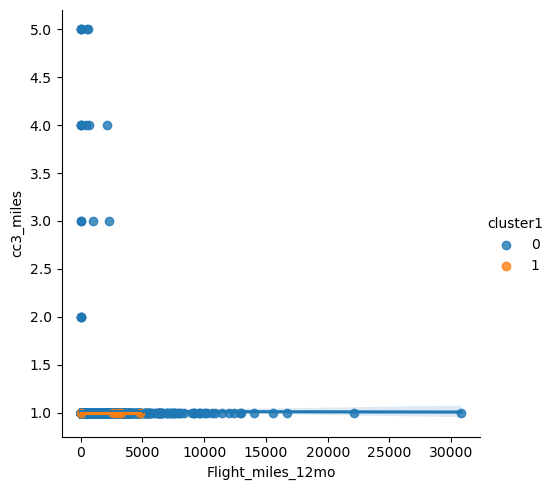

In [79]:
# visualisation
sns.lmplot(data=df1,x='Flight_miles_12mo',y='cc3_miles',hue='cluster1');
plt.show()

In [80]:
df1.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster,cluster1
0,28143,1,1,1,174,1,0,0,7000,0,0
1,19244,1,1,1,215,2,0,0,6968,0,0
2,41354,1,1,1,4123,4,0,0,7034,4,0
3,14776,1,1,1,500,1,0,0,6952,0,0
4,97752,4,1,1,43300,26,2077,4,6935,5,0


## DBSCAN

In [81]:
df.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0
2,41354,1,1,1,4123,4,0,0,7034,0
3,14776,1,1,1,500,1,0,0,6952,0
4,97752,4,1,1,43300,26,2077,4,6935,1


In [82]:
df2=df.drop('Award?',axis=1)

In [83]:
df2.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,1,1,1,174,1,0,0,7000
1,19244,1,1,1,215,2,0,0,6968
2,41354,1,1,1,4123,4,0,0,7034
3,14776,1,1,1,500,1,0,0,6952
4,97752,4,1,1,43300,26,2077,4,6935


In [88]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()

In [89]:
df3=pd.DataFrame(std_sca.fit_transform(df2),columns=df2.columns)

In [90]:
from sklearn.cluster import DBSCAN

In [93]:
df3.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


In [91]:
# To define DBSCAN we need to assign the parameters eps & min_samples so we find optimum value of parameters as follows :-

In [94]:
output=[]
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11]
min_samples=range(1,11)
for i in eps:
    for j in min_samples:
        labels=DBSCAN(eps=i,min_samples=j).fit(df3).labels_
        score=silhouette_score(df3,labels)
        output.append([i,j,score])
        

In [95]:
output

[[0.1, 1, -0.03397900862089793],
 [0.1, 2, -0.5094341405207169],
 [0.1, 3, -0.44782659803785246],
 [0.1, 4, -0.37506267944970034],
 [0.1, 5, -0.33968104429751966],
 [0.1, 6, -0.34580130433849665],
 [0.1, 7, -0.30661935539894697],
 [0.1, 8, -0.296113110747157],
 [0.1, 9, -0.2886566128312238],
 [0.1, 10, -0.2906622227508962],
 [0.2, 1, -0.17541343907873044],
 [0.2, 2, -0.5044761606133624],
 [0.2, 3, -0.5321932701398983],
 [0.2, 4, -0.5279663263499778],
 [0.2, 5, -0.5249988706033195],
 [0.2, 6, -0.45093293706520604],
 [0.2, 7, -0.27875451147583796],
 [0.2, 8, -0.2566898131639895],
 [0.2, 9, -0.2603031757865178],
 [0.2, 10, -0.2569733191190285],
 [0.3, 1, -0.27202543570935644],
 [0.3, 2, -0.4558306137961027],
 [0.3, 3, -0.46090439514051046],
 [0.3, 4, -0.4232413217229295],
 [0.3, 5, -0.4350941935867271],
 [0.3, 6, -0.4371159666432374],
 [0.3, 7, -0.32991454451754726],
 [0.3, 8, -0.258205120945739],
 [0.3, 9, -0.2623611852334291],
 [0.3, 10, -0.27698586189179003],
 [0.4, 1, -0.2895653518500

In [96]:
# 0.9, 6, 0.5205156156855245,this has max score so we take eps=0.9 & min_samples=6.

In [97]:
cluster=DBSCAN(eps=0.9,min_samples=6).fit(df3).labels_

In [98]:
cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
np.unique(cluster)

array([-1,  0,  1,  2], dtype=int64)

In [ ]:
# here -1 indicates that data is outliers.

In [100]:
silhouette_score(df3,cluster)

0.5205156156855245

In [101]:
df3['cluster']=cluster

In [102]:
df3.head()

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,-0.451141,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,0


In [ ]:
# visualisation

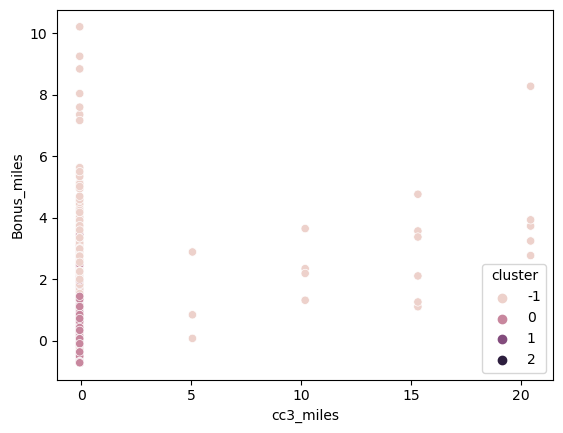

In [106]:
sns.scatterplot(data=df3,x='cc3_miles',y='Bonus_miles',hue='cluster')
plt.show()